In [1]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

C:\Users\Srinivasan M\AppData\Local\Temp\ipykernel_9644\52123672.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [3]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Genre_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


        UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0            1     1193       5       0          0          0           0   
1            1      661       3       0          0          1           1   
2            1      914       3       0          0          0           0   
3            1     3408       4       0          0          0           0   
4            1     2355       5       0          0          1           1   
...        ...      ...     ...     ...        ...        ...         ...   
817057    3537     3830       1       0          0          0           0   
817058    3537     3626       1       0          0          0           0   
817059    3537     3721       1       0          0          0           0   
817060    3537     2773       1       0          0          0           0   
817061    3537     3800       1       0          0          0           0   

        Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi 

In [4]:
# Convert MovieID and UserID to int16
data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)
for col in data_matrix.columns:
    if col != "MovieID" and col != "UserID":
        data_matrix[col] = data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


In [5]:
df=data_matrix
# Initialize an empty dictionary to store genre-wise ratings for each user
genre_ratings = {}
genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    user_id = row['UserID']
    rating = row['Rating']
    # Iterate over each genre and update the genre_ratings dictionary
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = {}
        if user_id not in genre_ratings[genre]:
            genre_ratings[genre][user_id] = {'total_rating': 0, 'count': 0}
        if row[genre] == 1:  # Check if the movie belongs to the genre
            genre_ratings[genre][user_id]['total_rating'] += rating
            genre_ratings[genre][user_id]['count'] += 1

# Initialize an empty dictionary to store the final DataFrame values
data = {}

# Iterate over each user and calculate the average rating for each genre
for user_id in set(df['UserID']):
    user_data = {}
    for genre, values in genre_ratings.items():
        if user_id in values and values[user_id]['count']>0:
            user_data[genre] = values[user_id]['total_rating'] / values[user_id]['count']
        else:
            user_data[genre] = np.nan
    data[user_id] = user_data

# Create the final DataFrame
result_df = pd.DataFrame.from_dict(data, orient='index')

In [6]:
data_mat=result_df
data_mat=data_mat.sort_index()
data_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.000000,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.000000,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.500000,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
6,4.000000,3.750000,4.222222,3.875000,3.750000,3.000000,NaN,3.727273,3.000000,NaN,NaN,4.315789,NaN,4.000000,3.500000,3.666667,4.000000,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,3.918367,3.842105,3.000000,4.000000,4.000000,3.285714,NaN,3.947368,4.000000,3.000000,3.666667,NaN,NaN,4.500000,3.823529,4.000000,3.727273,3.400000
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,NaN,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000


In [7]:
user_ids = set(df['UserID'])
user_ids=sorted(user_ids)
user_ids

[1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 13,
 15,
 17,
 18,
 19,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 42,
 44,
 45,
 48,
 49,
 52,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 73,
 75,
 76,
 78,
 82,
 83,
 87,
 88,
 90,
 92,
 93,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 105,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 155,
 156,
 157,
 161,
 162,
 163,
 165,
 166,
 167,
 169,
 170,
 174,
 175,
 176,
 178,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 190,
 192,
 193,
 194,
 195,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 223,
 224,
 225,
 229,
 230,
 231,
 232,
 233,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 249,
 251,
 252,
 253,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 267,
 268,
 270,
 271,
 273,
 274,

In [8]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [9]:
avg_rating

,Genre,Avg. Rating
0,Horror,3.215013
1,Children's,3.422035
2,Fantasy,3.447371
3,Sci-Fi,3.466521
4,Adventure,3.477257
5,Action,3.491185
6,Comedy,3.522099
7,Thriller,3.570466
8,Romance,3.607465
9,Western,3.637770


In [10]:
avgdict = avg_rating.set_index('Genre')['Avg. Rating'].to_dict()
avg_dict = {key: float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}


A_mat = data_mat
A_watched=data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
A_np=A_mat.values
A_np

array([[4.2       , 4.        , 4.11111111, ..., 3.66666667, 5.        ,
        3.63777015],
       [3.5       , 3.73684211, 3.68486822, ..., 3.48387097, 3.73333333,
        4.33333333],
       [3.95652174, 4.        , 4.        , ..., 3.8       , 4.        ,
        4.66666667],
       ...,
       [3.        , 2.98795181, 3.91176471, ..., 3.14285714, 3.78571429,
        3.64285714],
       [3.64285714, 4.        , 4.        , ..., 3.70588235, 4.        ,
        3.75      ],
       [2.97619048, 2.81818182, 3.        , ..., 3.92682927, 3.69565217,
        4.        ]])

In [11]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.20,4.00,4.11,4.25,4.14,4.00,3.93,4.43,4.00,4.08,3.22,4.29,3.67,3.67,4.33,3.67,5.00,3.64
2,3.50,3.74,3.68,3.42,3.56,3.58,3.93,3.90,3.00,4.00,3.00,3.67,3.33,3.71,3.59,3.48,3.73,4.33
3,3.96,4.00,4.00,4.00,3.77,3.71,3.93,4.00,4.50,4.08,2.67,4.00,3.00,3.80,3.83,3.80,4.00,4.67
5,2.61,3.00,4.00,3.83,3.41,3.29,3.67,3.10,3.45,4.00,2.80,3.33,3.12,3.10,3.07,2.85,3.50,4.00
6,4.00,3.75,4.22,3.88,3.75,3.00,3.93,3.73,3.00,4.08,3.22,4.32,3.67,4.00,3.50,3.67,4.00,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,3.92,3.84,3.00,4.00,4.00,3.29,3.93,3.95,4.00,3.00,3.67,3.67,3.67,4.50,3.82,4.00,3.73,3.40
6035,2.63,3.00,3.25,2.04,2.25,3.15,3.93,3.12,3.08,3.00,2.33,1.50,3.30,3.05,2.76,1.97,3.31,2.33
6036,3.00,2.99,3.91,3.44,3.20,3.53,3.91,3.51,3.00,4.06,2.99,3.71,3.41,3.35,2.83,3.14,3.79,3.64
6037,3.64,4.00,4.00,3.67,3.58,3.83,4.00,3.88,4.25,3.44,4.11,4.00,3.69,3.68,3.69,3.71,4.00,3.75


In [12]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
print("This is nonzero diag")
print(non_zero_diag)
U_red,Sigma_red,V_red = A.randomized_svd(len(non_zero_diag))  # Number of components for SVD 

WARN: no converge 

Outputs

[[ 0.07720147  0.02098531  0.02414577 ...  0.          0.
   0.        ]
 [ 0.06928885 -0.01147836  0.03057742 ...  0.          0.
   0.        ]
 [ 0.07409989 -0.00499694  0.05416402 ...  0.          0.
   0.        ]
 ...
 [ 0.06545395 -0.00377569  0.00790353 ...  0.          0.
   0.        ]
 [ 0.07312725 -0.01855269 -0.00649182 ...  0.          0.
   0.        ]
 [ 0.06979043  0.0106403  -0.00068595 ...  0.          0.
   0.        ]]
[[221.82795247   0.           0.         ...   0.           0.
    0.        ]
 [  0.          20.4008292    0.         ...   0.           0.
    0.        ]
 [  0.           0.          22.67054626 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
[[ 2.24504649e-01  2.45590559e-01  1.09920238e-

In [13]:
np.savetxt('U_red_Kmeans.txt', U_red)
np.savetxt('Sigma_red_Kmeans.txt', Sigma_red)
np.savetxt('V_red_Kmeans.txt', V_red)

In [14]:
U_red = np.loadtxt('U_red_Kmeans.txt')
Sigma_red = np.loadtxt('Sigma_red_Kmeans.txt')
V_red = np.loadtxt('V_red_Kmeans.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)

(3743, 18)
(18, 18)
(18, 18)


In [15]:
def elbow_method(data, max_clusters=4 , skip_factor=1):
    distortions = []
    # Generate x-axis values with skip_factor increments
    x_values = range(skip_factor, max_clusters + 1, skip_factor)
    for i in x_values:
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())  # km.inertia_ gives the distortion (cost)
    # Plotting the elbow curve
    plt.plot(x_values, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

new_mat = U_red
new_mat
# Assuming your data is in V_red_T
# Perform Elbow Method


array([[ 0.07720147,  0.02098531,  0.02414577, ...,  0.00256972,
        -0.01546781,  0.0713947 ],
       [ 0.06928885, -0.01147836,  0.03057742, ...,  0.00041991,
        -0.02972565, -0.01772387],
       [ 0.07409989, -0.00499694,  0.05416402, ...,  0.01348738,
        -0.03482932,  0.00350429],
       ...,
       [ 0.06545395, -0.00377569,  0.00790353, ..., -0.00209508,
        -0.00454393, -0.00744267],
       [ 0.07312725, -0.01855269, -0.00649182, ...,  0.01785299,
         0.00768896,  0.0054598 ],
       [ 0.06979043,  0.0106403 , -0.00068595, ...,  0.00341201,
        -0.00296955, -0.03241049]])

sample_points_ids
[2056, 563, 1063]
the tuples
(0.06486403944710553, -0.008932570579093285, 0.011212582672813507, -0.018246903362780502, -0.01019222985916979, -0.0135713554521375, 0.035643670293409896, -0.010096145049222854, 0.0026719550575420715, 0.0032276106579971924, -0.008715753703665606, 0.0031765743831912493, 0.026561945357276247, 0.004138153503051744, 0.0374326081589354, 0.030616521950408954, 0.02468775083502574, 0.010559049604760682)
Distance Matrix
[[0.11877497 0.14109069 0.26155836]
 [0.10196252 0.04579069 0.225241  ]
 [0.11483695 0.09305489 0.24717642]
 ...
 [0.10261802 0.06475171 0.22089012]
 [0.07904747 0.08500802 0.22788659]
 [0.11466388 0.10946173 0.20703458]]
closest
[0 1 1 ... 1 0 1]
Distance Matrix
[[0.06981502 0.10286033 0.19778122]
 [0.07993256 0.04017688 0.15565528]
 [0.08917607 0.0860261  0.18921112]
 ...
 [0.07346025 0.03952708 0.15592465]
 [0.057592   0.06941172 0.16306593]
 [0.10577468 0.08464264 0.14240277]]
closest
[0 1 1 ... 1 0 1]
Distance Matrix
[[0.065725

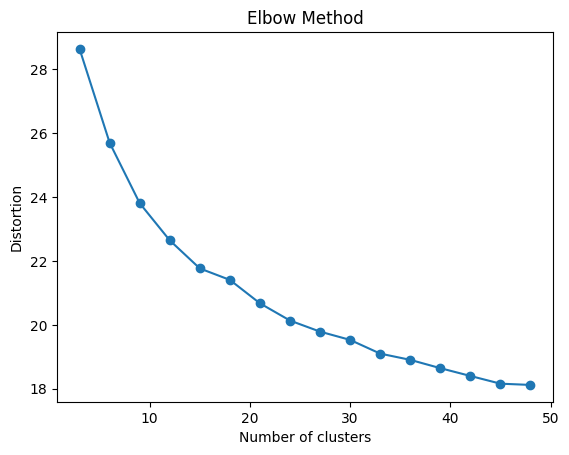

In [16]:
elbow_method(U_red,50,3)

In [17]:
km = KMeans(50)
km.fit(U_red)

sample_points_ids
[203, 3719, 628, 1519, 195, 1467, 545, 1460, 1720, 3633, 1484, 1857, 2132, 3280, 787, 697, 281, 3024, 2669, 3332, 1525, 469, 1575, 3116, 943, 3626, 1763, 1149, 2945, 2909, 3011, 2101, 360, 984, 3496, 17, 3393, 725, 3027, 261, 24, 408, 49, 1774, 135, 3562, 2536, 3241, 2589, 242]
the tuples
(0.06545341706571399, 0.011059237329813797, 0.012081579561977659, 0.010837083242218494, -0.013905162862827582, -0.042752648815747446, -0.0192437175631996, 0.05322471172994739, 0.0047753865105261755, 0.0007200318213887979, -0.007072287836932836, -0.006986629369660356, -0.012602201854209797, -0.013022491787261328, 0.029520438806989263, -0.018353268301558923, 0.005231527685485017, -0.006914644159669852)
Distance Matrix
[[0.12740582 0.11978577 0.08749293 ... 0.14359831 0.08774947 0.07116439]
 [0.08576953 0.10340788 0.10982335 ... 0.08760964 0.08673212 0.13950749]
 [0.1491472  0.11234513 0.11175953 ... 0.10892636 0.09001158 0.11435882]
 ...
 [0.08556123 0.1173049  0.08615177 ... 0.087542 

In [18]:
class SimilarityMetric:

    def calculateSimilarity(self, u, v, u_mean, v_mean):
        pass

In [19]:
class CosineSimilarity(SimilarityMetric):
    def calculateSimilarity(self, u, v, u_mean, v_mean):
        u = np.nan_to_num(u, nan=0)
        v = np.nan_to_num(v, nan=0)
        return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v) + 1e-9)

In [33]:
class CollaborativeFiltering:

    def __init__(self, data, metric:SimilarityMetric):
        """
        Initialize CollaborativeFiltering object with user-item rating data.
        
        Parameters:
        - data: DataFrame containing user-item ratings
        """
        self.data = data
        self.similarity_matrix = None
        self.metric = metric
        self.movies = pd.read_csv("movies.csv")
        self.movies.set_index('MovieID', inplace=True)

    def calculate_similarity_matrix(self):
        pass

    def predict_ratings(self, user_id):
        pass
    
    def getMovies(self, user_id, movie_id_list):

        recommendations = []
    
        for i in movie_id_list:

            user = pd.DataFrame(self.data.loc[user_id], index = self.data.columns, columns = ['a'])
            rating = user.loc[i]
            movie = self.movies.loc[i]
            recommendations.append([i, rating, movie['Title'], movie['Genres']])

        return recommendations
    
    def getSimilarityMatrix(self):
        return self.similarity_matrix

In [38]:
class CollaborativeFilteringItemItem(CollaborativeFiltering):

    def __init__(self, data, metric:SimilarityMetric):
        super().__init__(data, metric)
        self.means = self.data.mean(axis=0)
    
    def calculate_similarity_matrix(self):
        
        # user_item_matrix = self.train_data.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)
        
        n_movies = self.data.shape[1]
        similarity_matrix = np.zeros((n_movies, n_movies))
        for i in range(n_movies):
            for j in range(i+1):
                temp = self.metric.calculateSimilarity(self.data.iloc[:, i], self.data.iloc[:, j], self.means[self.data.columns[i]], self.means[self.data.columns[j]])
                similarity_matrix[i, j] = temp
                similarity_matrix[j, i] = temp

        self.similarity_matrix = pd.DataFrame(similarity_matrix, index=self.data.columns, columns=self.data.columns)

    def predict_ratings(self, user_id,user_ids):
        """
        Predict ratings for items for a given user.

        Parameters:
        - user_id: ID of the user for whom to predict ratings

        Returns:
        - DataFrame containing predicted ratings for each item
        """

        user_ratings = self.data.loc[user_ids[user_id]]
        print("User Ratings")
        print(user_ratings)
        predicted_ratings = pd.DataFrame(index=self.data.columns, columns=['PredictedRating'])

        for movie_id in predicted_ratings.index:
            numerator = 0
            denominator = 0

            for other_movie_id in predicted_ratings.index:
                if (other_movie_id != movie_id):
                    similarity = self.similarity_matrix.loc[movie_id, other_movie_id]
                    other_movie_rating = user_ratings[other_movie_id]

                    if not np.isnan(other_movie_rating):
                        numerator += similarity * (other_movie_rating) 
                        denominator += abs(similarity)
            
            predicted_ratings.loc[movie_id, 'PredictedRating'] = numerator / (denominator + 1e-9)
            
        return predicted_ratings
        

In [39]:
# Recommend movies for a particular user
def recommend_movies(user_id, data, users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    index = []
    for row,cluster in cluster_labels.items():
        # if cluster == user_cluster and row!=user_idx[user_id]:
        if cluster == user_cluster:
            cluser_users.append(users_watched.iloc[row])
            # index.append(users_watched.index[row])
            index.append(row) 

    # rating_movie = {}
    # movie_rating_count={}
    # for df in cluser_users:
    #     for key,value in df[df.notnull()].items():
    #         if int(key) not in rating_movie:
    #             rating_movie[int(key)] = 0
    #             movie_rating_count[int(key)] = 0
            
    #         rating_movie[int(key)]+=float(value)
    #         movie_rating_count[int(key)]+=1

    # for key,value in movie_rating_count.items():
    #     if(value>0):
    #         rating_movie[key]=rating_movie[key]/float(value)

    # final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    # movies=pd.read_csv("movies.csv")
    # movies=movies.set_index(keys=['MovieID'])
    # recommendations=[]
    # for x in final_list:
    #     movie=movies.loc[x[0]]
    #     recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    # return recommendations
    print("Index")
    print(index)    
    user_item_matrix_new = pd.DataFrame(cluser_users, index = np.array(index))

    print(user_item_matrix_new)
    metric = CosineSimilarity()
    cf = CollaborativeFilteringItemItem(user_item_matrix_new, metric)

    cf.calculate_similarity_matrix()

    prediction_df = cf.predict_ratings(user_id,user_idx)

    ids = prediction_df.sort_values(by=['PredictedRating']).tail(10).index
    movies = cf.getMovies(user_id, ids)

    return movies

In [40]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = 8  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, new_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 21, 1: 19, 2: 26, 3: 26, 4: 26, 5: 13, 6: 19, 7: 48, 8: 20, 9: 40, 10: 8, 11: 33, 12: 26, 13: 48, 14: 26, 15: 48, 16: 23, 17: 35, 18: 20, 19: 13, 20: 8, 21: 17, 22: 43, 23: 19, 24: 40, 25: 11, 26: 26, 27: 22, 28: 17, 29: 6, 30: 18, 31: 35, 32: 18, 33: 0, 34: 22, 35: 12, 36: 2, 37: 1, 38: 9, 39: 8, 40: 21, 41: 40, 42: 4, 43: 14, 44: 31, 45: 36, 46: 2, 47: 45, 48: 18, 49: 42, 50: 28, 51: 49, 52: 34, 53: 11, 54: 16, 55: 42, 56: 40, 57: 48, 58: 17, 59: 8, 60: 33, 61: 9, 62: 5, 63: 0, 64: 43, 65: 30, 66: 10, 67: 42, 68: 15, 69: 21, 70: 1, 71: 4, 72: 27, 73: 1, 74: 19, 75: 36, 76: 38, 77: 5, 78: 20, 79: 24, 80: 43, 81: 48, 82: 17, 83: 46, 84: 27, 85: 18, 86: 38, 87: 49, 88: 2, 89: 45, 90: 30, 91: 27, 92: 1, 93: 19, 94: 13, 95: 1, 96: 10, 97: 47, 98: 17, 99: 13, 100: 31, 101: 6, 102: 16, 103: 24, 104: 21, 105: 17, 106: 48, 107: 33, 108: 42, 109: 10, 110: 27, 111: 20, 112: 33, 113: 5, 114: 26, 115: 22, 116: 20, 117: 22, 118: 36, 119: 40, 120: 2, 121: 7, 122: 45, 123: 8, 124

In [ ]:
df=A_watched.loc[user_id]
result_map = {}

for key,value in df[df.notnull()].items():
    result_map[key] = value

movies=pd.read_csv("movies.csv")
movies=movies.set_index(keys=['MovieID'])
result_map=dict(sorted(result_map.items(), key=lambda item: item[1],reverse=True))

movies_currently_watched=[]
for movieID,rating in result_map.items():
    movie=movies.loc[movieID]
    movies_currently_watched.append([movieID,rating,movie['Title'],movie['Genres']])

print("Movies Watched by User :", user_id)
for movie in movies_currently_watched:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles

Movies Watched by User : 8
Title : Leaving Las Vegas (1995) , MovieID : 25 , Rating : 5.0 , Genres : Drama|Romance
Title : Postino, Il (The Postman) (1994) , MovieID : 58 , Rating : 5.0 , Genres : Drama|Romance
Title : Braveheart (1995) , MovieID : 110 , Rating : 5.0 , Genres : Action|Drama|War
Title : Taxi Driver (1976) , MovieID : 111 , Rating : 5.0 , Genres : Drama|Thriller
Title : Desperado (1995) , MovieID : 163 , Rating : 5.0 , Genres : Action|Romance|Thriller
Title : Interview with the Vampire (1994) , MovieID : 253 , Rating : 5.0 , Genres : Drama|Horror
Title : Natural Born Killers (1994) , MovieID : 288 , Rating : 5.0 , Genres : Action|Thriller
Title : Pulp Fiction (1994) , MovieID : 296 , Rating : 5.0 , Genres : Crime|Drama
Title : What's Eating Gilbert Grape (1993) , MovieID : 337 , Rating : 5.0 , Genres : Drama
Title : Heaven & Earth (1993) , MovieID : 465 , Rating : 5.0 , Genres : Action|Drama|War
Title : Jurassic Park (1993) , MovieID : 480 , Rating : 5.0 , Genres : Actio